In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [ ]:
data =pd.read_csv('disney_plus_titles.csv')

In [ ]:
data['date_added']=pd.to_datetime(data['date_added'], format='%B %d, %Y')
data.sort_values('date_added')
data=data.set_index('date_added')
data=data.drop('show_id',axis=1)
data.head()

,type,title,director,performers,country,release_year,rating,duration,listed_in,description
date_added,,,,,,,,,,
2021-11-26,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
2021-11-26,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2021-11-26,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
2021-11-26,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
2021-11-25,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
data.shape

(1450, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1450 entries, 2021-11-26 to 2020-04-01
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   title         1450 non-null   object
 2   director      977 non-null    object
 3   performers    1260 non-null   object
 4   country       1231 non-null   object
 5   release_year  1450 non-null   int64 
 6   rating        1447 non-null   object
 7   duration      1450 non-null   object
 8   listed_in     1450 non-null   object
 9   description   1450 non-null   object
dtypes: int64(1), object(9)
memory usage: 124.6+ KB


In [ ]:
data.columns

Index(['type', 'title', 'director', 'performers', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
data['country']

date_added
2021-11-26                                       NaN
2021-11-26                                       NaN
2021-11-26                             United States
2021-11-26                                       NaN
2021-11-25                                       NaN
                               ...                  
2021-06-04             United States, United Kingdom
2021-04-02                     United States, Canada
2020-12-18    United Kingdom, Germany, United States
2020-09-18    United Kingdom, Germany, United States
2020-04-01                             United States
Name: country, Length: 1450, dtype: object

In [ ]:
data['country'].unique()

array([nan, 'United States', 'United States, Canada',
       'United States, Australia', 'Canada',
       'United States, United Kingdom', 'United States, South Korea',
       'Ireland, United States, Canada, United Kingdom, Denmark, Spain, Poland, Hungary',
       'France, United Kingdom', 'United Kingdom, Australia',
       'Ireland, United States', 'Canada, United States, France',
       'France, South Korea, Japan, United States', 'France',
       'United States, United Kingdom, Hungary', 'United States, Germany',
       'United States, United Kingdom, Australia', 'United States, India',
       'United States, Canada, United Kingdom, Singapore, Australia, Thailand',
       'Canada, United States',
       'South Korea, United States, China, Japan',
       'Australia, United Kingdom', 'United Kingdom',
       'United States, United Kingdom, South Korea',
       'United States, United Kingdom, Canada',
       'United States, Germany, United Kingdom',
       'United States, Canada, Ire

Text(0.5, 1.0, 'Distribution of Movie/TV Show')

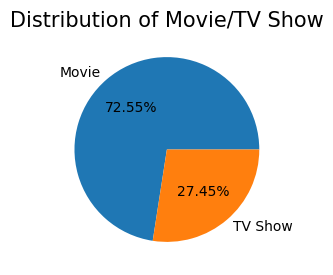

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.subplots(figsize = (3,3))
plt.pie(x=data["type"].value_counts(),labels=data["type"].value_counts().index , autopct= "%.2f%%" )
plt.title('Distribution of Movie/TV Show', size=15)

In [ ]:
data[data['type']=='Movie'].isnull().sum()

type              0
title             0
director         75
performers      119
country         106
release_year      0
rating            1
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
data[data['type']=='TV Show'].isnull().sum()

type              0
title             0
director        398
performers       71
country         113
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
movie_type = ", ".join(data['listed_in'].dropna()).split(", ")

In [ ]:
len(movie_type)

3910

In [ ]:
movie_type_count = Counter(movie_type)
movie_type_count={k: v for k, v in sorted(movie_type_count.items(), key=lambda item: item[1],reverse=True)}

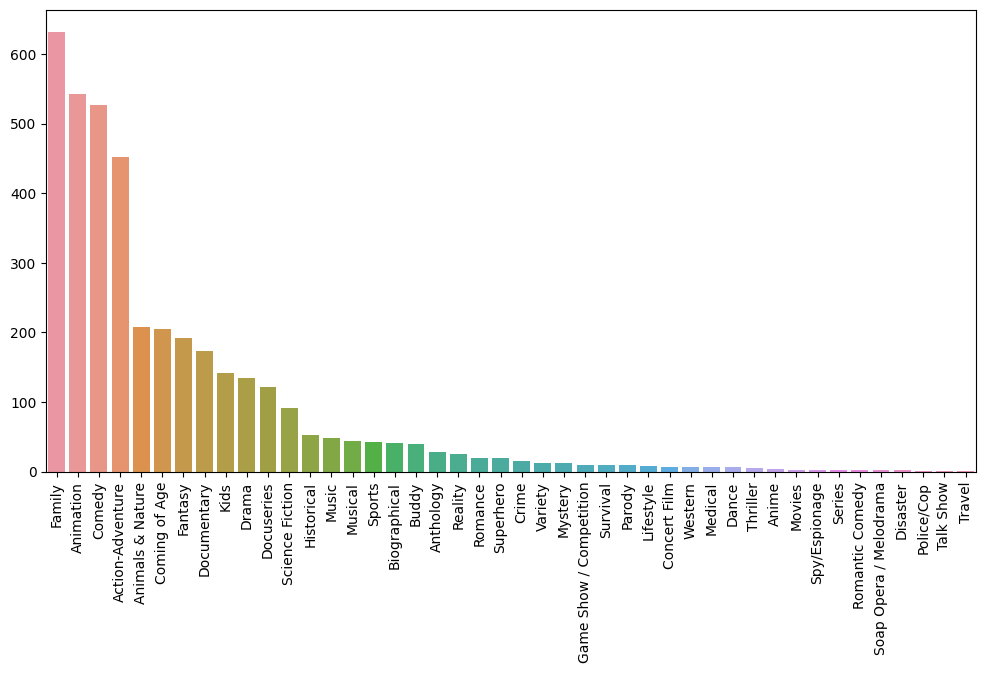

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(movie_type_count.keys()),y=list(movie_type_count.values()))
plt.xticks(rotation=90)
plt.show()

In [ ]:
country = ", ".join(data['country'].dropna()).split(', ')

In [ ]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

In [ ]:
country_with_code = {}
country_name = {}

In [ ]:
dict(Counter(country)).items()

dict_items([('United States', 1184), ('Canada', 77), ('Australia', 23), ('United Kingdom', 101), ('South Korea', 13), ('Ireland', 8), ('Denmark', 3), ('Spain', 4), ('Poland', 2), ('Hungary', 3), ('France', 22), ('Japan', 10), ('Germany', 9), ('India', 5), ('Singapore', 2), ('Thailand', 1), ('China', 10), ('Brazil', 1), ('Belgium', 1), ('Austria', 2), ('South Africa', 3), ('Hong Kong', 4), ('Argentina', 3), ('United Arab Emirates', 2), ('Mexico', 4), ('Switzerland', 1), ('Taiwan', 6), ('Philippines', 2), ('Tanzania', 1), ('Panama', 1), ('Angola', 1), ('Botswana', 1), ('Namibia', 1), ('Luxembourg', 1), ('Guatemala', 1), ('Russia', 1), ('Malaysia', 2), ('Kazakhstan', 1), ('Syria', 1), ('Iran', 1), ('Egypt', 1), ('Pakistan', 1), ('New Zealand', 3), ('Norway', 1), ('Sweden', 1), ('Slovenia', 1), ('Czech Republic', 1)])

In [ ]:
for c,v in dict(Counter(country)).items():
    if(c.lower() in (country_codes)):
        code=country_codes[c.lower()]
        country_with_code[code]=v
        country_name[c]=v

In [ ]:
fig = px.choropleth( locations=list(country_with_code.keys()),
                    color=list(country_with_code.values()),
                    hover_name=list(country_name.keys()),
                    )
fig.show()

In [ ]:
country_name={k: v for k, v in sorted(country_name.items(), key=lambda item: item[1],reverse=True)}
country_name_20=dict(list(country_name.items())[:20])
country_name_20

{'United States': 1184,
 'United Kingdom': 101,
 'Canada': 77,
 'Australia': 23,
 'France': 22,
 'South Korea': 13,
 'Japan': 10,
 'China': 10,
 'Germany': 9,
 'Ireland': 8,
 'Taiwan': 6,
 'India': 5,
 'Spain': 4,
 'Hong Kong': 4,
 'Mexico': 4,
 'Denmark': 3,
 'Hungary': 3,
 'South Africa': 3,
 'Argentina': 3,
 'New Zealand': 3}

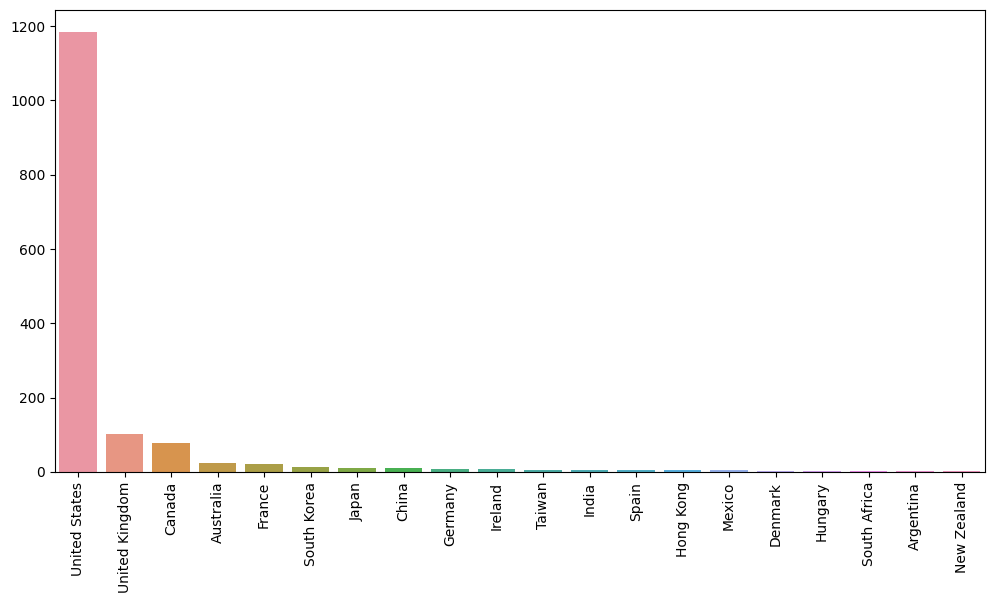

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=list(country_name_20.keys()),y=list(country_name_20.values()))
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.columns

Index(['type', 'title', 'director', 'performers', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

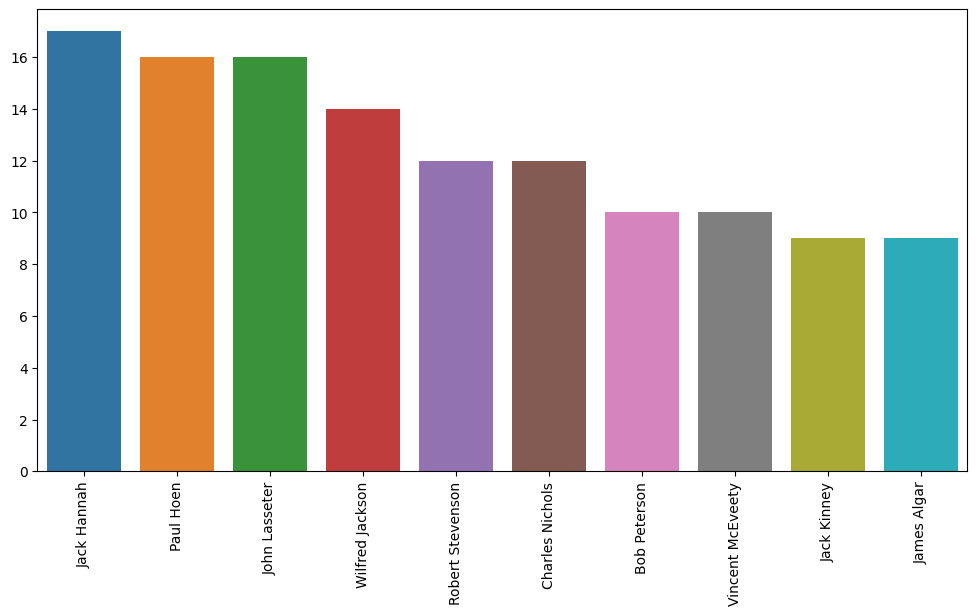

In [ ]:
director = ','.join(data['director'].dropna()).split(',')
director_name = Counter(director)
director_name1={k: v for k, v in sorted(director_name.items(), key=lambda item: item[1],reverse=True)}
director_name2=dict(list(director_name1.items())[:10])
plt.figure(figsize=(12,6))
sns.barplot(x=list(director_name2.keys()),y=list(director_name2.values()))
plt.xticks(rotation=90)
plt.show()

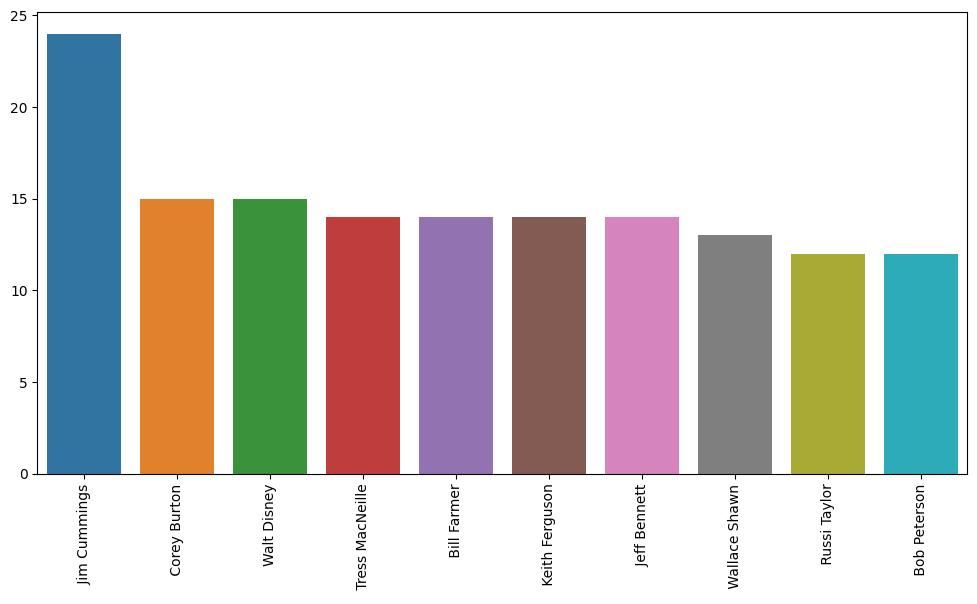

In [ ]:
cast = ','.join(data['performers'].dropna()).split(',')
cast_name = Counter(cast)
cast_name1={k: v for k, v in sorted(cast_name.items(), key=lambda item: item[1],reverse=True)}
cast_name2=dict(list(cast_name1.items())[:10])

plt.figure(figsize=(12,6))
sns.barplot(x=list(cast_name2.keys()),y=list(cast_name2.values()))
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'TREND OF RATING')

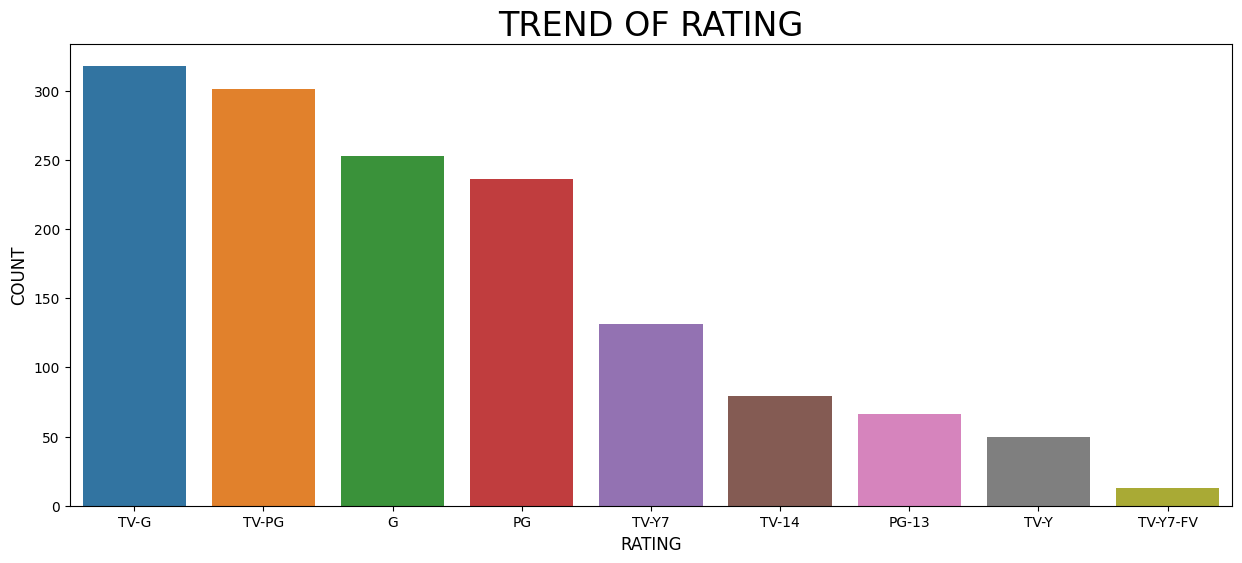

In [ ]:
plt.figure(figsize=(15,6))
temp= data.rating.value_counts()
sns.barplot(x="index" , y="rating" , data = temp.reset_index())
plt.xlabel("RATING", size=12)
plt.ylabel("COUNT", size=12)
plt.title("TREND OF RATING", size=24)

Text(0.5, 1.0, 'Release Frequency For 2016 - 2020')

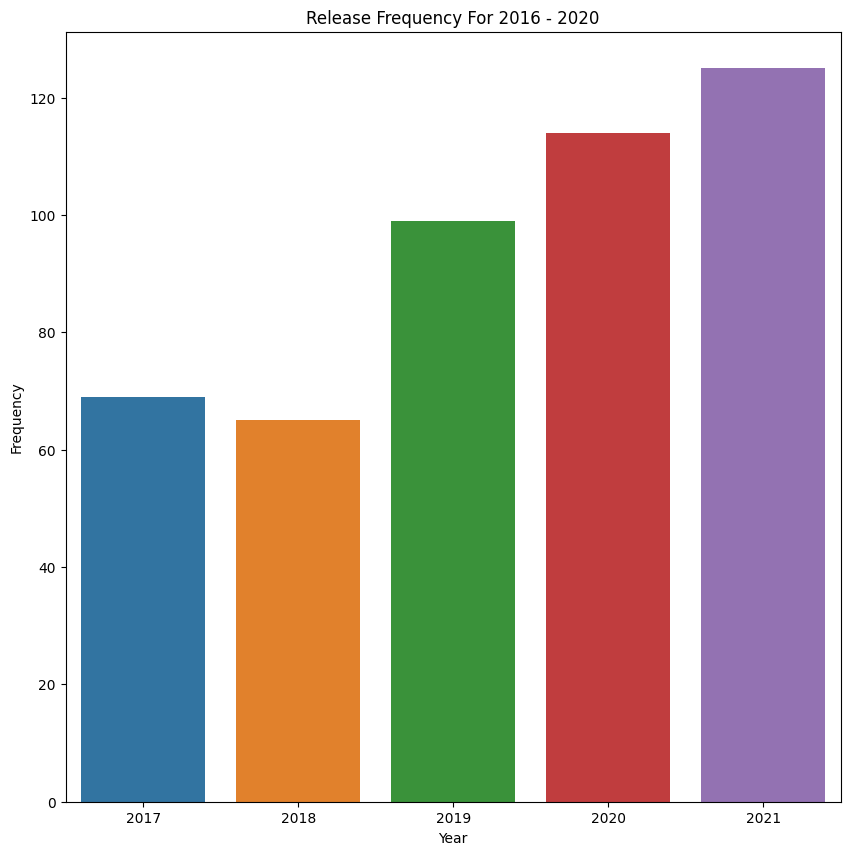

In [ ]:
ax = plt.subplots(figsize = (10,10))
sns.barplot(x = data['release_year'].value_counts().index[:5], y = data['release_year'].value_counts()[:5])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Release Frequency For 2016 - 2020')